In [8]:
import sys
import pickle
from scipy import signal
from scipy import stats
import numpy as np
from sklearn.model_selection import ShuffleSplit

import socket
import time

import math
from collections import OrderedDict


import matplotlib.pyplot as plt

sys.path.append('D:\Diamond\code')
from csp_james_2 import *

sys.path.append('D:\Diamond\code')
from thesis_funcs_19_03 import *

import csv
import datetime
from random import randint
import random
import matplotlib.image as mpimg
%matplotlib auto

Using matplotlib backend: Qt5Agg


# Define classes and how many trials per class

In [2]:
C_OVR  = [0,1] #MI classes, [0,1,2,3] for left hand, right hand, feet, tongue
_classes  = C_OVR*7 #*trials per MI class
random.shuffle(_classes) #randomize sequence of MI classes

In [3]:
fileroot = 'E:\\Diamond\\own_expo\\'
filewrite = open(fileroot + 'record.txt','w')
filewrite.write('')
filewrite.close()

file_cross = open(fileroot + 'cross_sign.txt','w')
file_cross.write('0')
file_cross.close()

endgame = open(fileroot + 'endgame.txt','w')
endgame.write('0')
endgame.close()


filewrite = open(fileroot + 'record.txt','a')


In [4]:
plt.ioff()


In [5]:
end = 0

# Connect to Openvibe aquisition server (AS)

In [ ]:
# host and port of tcp tagging server
HOST = '127.0.0.1' #local machine address
PORT = 15361 #port to connect to AS

# transform a value into an array of byte values in little-endian order.
def to_byte(value, length):
    for x in range(length):
        yield value%256
        value//=256
        
# connect 
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST, PORT))

#padding of zeros to keep length of tag consistant
padding=[0]*8

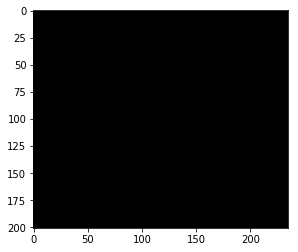

KeyboardInterrupt: 

In [6]:
n = 0
reso = 0.001
reso1 = 0.2
pltpause = 0.05


fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fig.canvas.draw()
img = mpimg.imread('E:\\Diamond\\cues\\black.png')
ax.imshow(img)
fig.canvas.draw()
plt.pause(pltpause)


t0 = datetime.datetime.now()
filewrite.write('rest,' + str(t0) + '\n')

cross = t0 + datetime.timedelta(0,randint(0,5)/10 + 6)
cue = cross + datetime.timedelta(0,1)
rest = cue + datetime.timedelta(0,4)

cross_exed = 0
cue_exed = 0
rest_exed = 0


while n < len(_classes):


    if cross_exed == 0 and np.abs(cross - datetime.datetime.now()).total_seconds() < reso:
        
        img = mpimg.imread('E:\\Diamond\\cues\\fixation.png')
        ax.clear()
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)
        filewrite.write('cross,' + str(datetime.datetime.now()) + '\n')
        
        file_cross = open(fileroot + 'cross_sign.txt','w')
        file_cross.write('1')
        file_cross.close()
        
        print ('cross', datetime.datetime.now())
        print ('_classes', _classes[n])
        
        cross_exed = 1
    elif cross_exed == 0 and (datetime.datetime.now()-cross).total_seconds() < 0.2 and (datetime.datetime.now()-cross).total_seconds() > reso:
        ax.clear()
        img = mpimg.imread('E:\\Diamond\\cues\\fixation.png')
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)
        filewrite.write('cross,' + str(datetime.datetime.now()) + '\n')
        print ('cross1', datetime.datetime.now())
        print ('_classes', _classes[n])
        cross_exed = 1
    
        file_cross = open(fileroot + 'cross_sign.txt','w')
        file_cross.write('1')
        file_cross.close()
    
    if cue_exed == 0 and np.abs(cue - datetime.datetime.now()).total_seconds() < reso:
        if _classes[n] == 0:
            img = mpimg.imread('E:\\Diamond\\cues\\left_hand.png')
            EVENT_ID = 0x442 #LEFT HAND (1089) EVENT_IDs are used to tag eeg streams in openvibe, IDs are pre-defined at http://openvibe.inria.fr/stimulation-codes/
        elif _classes[n] == 1:
            img = mpimg.imread('E:\\Diamond\\cues\\right_hand.png')
            EVENT_ID = 0x441 #RIGHT HAND (1090)
        elif _classes[n] == 2:
            img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
            EVENT_ID = 0x303 #FOOT (FEET) (771)
        elif _classes[n] == 3:
            img = mpimg.imread('E:\\Diamond\\cues\\tongue.jpg')
            EVENT_ID = 0x304 #TONGUE (772)
        
        
        
        ax.clear()
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)
        
        #same time tag for record.txt and openvibe eeg streams
        time_datetime = datetime.datetime.now()
        time_unix = time.time()
        
        filewrite.write('cue,' + str(_classes[n]) + ',' + str(time_datetime) + '\n')
        
        #event_id to byte format
        event_id=list(to_byte(EVENT_ID, 8))
        # timestamp can be either the posix time in ms, or 0 to let the acquisition server timestamp the tag itself.
        timestamp=list(to_byte(int(time_unix*1000), 8))
        #send tag to openvibe, tag is padding + event_id + timestamp in unix time, in uint64 format
        s.sendall(bytearray(padding+event_id+timestamp))
        
        print ('cue', datetime.datetime.now())
        print ('_classes', _classes[n])
        
        
        cue_exed = 1     
    elif cue_exed == 0 and (datetime.datetime.now()-cue).total_seconds() < 0.2 and (datetime.datetime.now()-cue).total_seconds() > reso:
        if _classes[n] == 0:
            img = mpimg.imread('E:\\Diamond\\cues\\left_hand.png')
        elif _classes[n] == 1:
            img = mpimg.imread('E:\\Diamond\\cues\\right_hand.png')
        elif _classes[n] == 2:
            img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
        elif _classes[n] == 3:
            img = mpimg.imread('E:\\Diamond\\cues\\tongue.jpg')
        ax.clear()
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)        
        filewrite.write('cue,' + str(_classes[n]) + ',' + str(datetime.datetime.now()) + '\n')

        print ('cue1', datetime.datetime.now())
        print ('_classes', _classes[n])
        cue_exed = 1
        
    if rest_exed == 0 and np.abs(rest - datetime.datetime.now()).total_seconds() < reso:
        img = mpimg.imread('E:\\Diamond\\cues\\black.png')
        ax.clear()
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)
        filewrite.write('rest,' + str(datetime.datetime.now()) + '\n')
   
        print ('rest', datetime.datetime.now())
        print ('_classes', _classes[n])
        rest_exed = 1
    elif rest_exed == 0 and (datetime.datetime.now()-rest).total_seconds() < 0.2 and (datetime.datetime.now()-rest).total_seconds() > reso:
        img = mpimg.imread('E:\\Diamond\\cues\\black.png')
        ax.clear()
        ax.imshow(img)
        fig.canvas.draw()
        plt.pause(pltpause)
        filewrite.write('rest,' + str(datetime.datetime.now()) + '\n')
        
        print ('rest1', datetime.datetime.now())
        print ('_classes', _classes[n])
        rest_exed = 1
        
    if cross_exed == 1 and cue_exed==1 and rest_exed == 1:
        cross = rest + datetime.timedelta(0,randint(0,5)/10 + 6)
        cue = cross + datetime.timedelta(0,1)
        rest = cue + datetime.timedelta(0,4)
        
        cross_exed = 0
        cue_exed = 0
        rest_exed = 0
        
       
        n = n +1
        print (n)
        
        
filewrite.close()
s.close()

end = 1
if end == 1:
    endgame = open(fileroot + 'endgame.txt','w')
    endgame.write('1')
    endgame.close()

In [52]:
j

NameError: name 'j' is not defined

In [336]:
plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.canvas.draw()
t0 = datetime.datetime.now()
img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
ax.imshow(img)
fig.show()

plotted = 0
while (datetime.datetime.now()-t0).total_seconds() < 5:
    if plotted == 0 and (datetime.datetime.now()-t0).total_seconds() > 2:
        ax.clear()
        img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
        print('shit')
        ax.imshow(img)
        plotted = 1
        fig.canvas.draw()



shit


In [16]:
#plt.ion()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig.canvas.draw()


img1 = mpimg.imread('E:\\Diamond\\cues\\feet.png')
img2 = mpimg.imread('E:\\Diamond\\cues\\black.png')


ax.imshow(img1)
fig.canvas.draw()

plt.pause(0.1)

ax.clear()
ax.imshow(img2)
fig.canvas.draw()

In [345]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [303]:
%matplotlib
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
ax.imshow(img)
fig.show()

Using matplotlib backend: Qt5Agg


In [274]:
img

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

In [244]:
_classes

[0, 1, 0, 1]

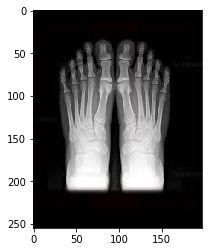

In [239]:
import matplotlib.image as mpimg
img = mpimg.imread('E:\\Diamond\\cues\\fixation.png')
plt.figure(1)

plt.imshow(img)

plt.clf()
img = mpimg.imread('E:\\Diamond\\cues\\feet.png')
plt.imshow(img)



In [169]:
rest

datetime.datetime(2019, 7, 13, 22, 1, 18, 121353)

In [115]:
timer = threading.Timer(10000, print('cue'))
timer.start()

cue


Exception in thread Thread-8:
Traceback (most recent call last):
  File "D:\THINKPAD\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "D:\THINKPAD\Anaconda3\lib\threading.py", line 1158, in run
    self.function(*self.args, **self.kwargs)
TypeError: 'NoneType' object is not callable



In [116]:
cue

datetime.datetime(2019, 5, 26, 14, 37, 2, 895526)

In [111]:
t0

datetime.datetime(2019, 5, 26, 14, 37, 0, 895526)

In [101]:
np.abs((datetime.datetime.now() - (datetime.datetime.now()+datetime.timedelta(0,4))).total_seconds())

4.0

In [89]:
x=datetime.datetime.today()
y=x.replace(day=x.day+1, hour=1, minute=0, second=0, microsecond=0)

In [90]:
x

datetime.datetime(2019, 5, 26, 14, 26, 33, 392018)

In [91]:
y

datetime.datetime(2019, 5, 27, 1, 0)

In [64]:
t0 + datetime.timedelta(0,60)

datetime.datetime(2019, 5, 26, 14, 19, 8, 155356)

In [65]:
t0

datetime.datetime(2019, 5, 26, 14, 18, 8, 155356)

In [49]:
t0 = datetime.datetime.now()
dt = (datetime.datetime.now() - t0)
while dt.total_seconds()  <= 5:
    dt = (datetime.datetime.now() - t0)
print (dt.total_seconds(), datetime.datetime.now())

5.000638 2019-05-26 14:10:15.671486


In [50]:
t0

datetime.datetime(2019, 5, 26, 14, 10, 10, 670848)

In [48]:
t0.

datetime.datetime(2019, 5, 26, 14, 7, 49, 772658)